In [117]:
import numpy as np
import json
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import Point, Polygon

from translitua import translit

In [118]:
regions_path = "data/regions/UKR_adm1.shp"
cities_path = "data/cities/cities.csv"

report_path = "data/tarilka/report.csv"

In [119]:
# list of already existing warehouses
warehouses = ["L'viv", "Kiev", 'Kherson']

In [120]:
df_regions = gpd.read_file(regions_path)
df_regions.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,240,UKR,Ukraine,1,Cherkasy,UA.CK,0,None,Oblast',Region,None,Cherkas'ka Oblast'|Cherkasskaya Oblast'|Cherkassy,"POLYGON ((32.15047 50.19769, 32.15050 50.19181..."
1,240,UKR,Ukraine,2,Chernihiv,UA.CH,0,None,Oblast',Region,None,Chernigov|Tschernigow,"POLYGON ((33.19667 52.37500, 33.20612 52.36700..."
2,240,UKR,Ukraine,3,Chernivtsi,UA.CV,0,None,Oblast',Region,None,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,"POLYGON ((25.62595 48.67673, 25.64460 48.67159..."
3,240,UKR,Ukraine,4,Crimea,UA.KR,0,None,Autonomous Republic,Autonomous Republic,None,Crimée|Criméia|Krim|Krymskaya Respublika|Respu...,"MULTIPOLYGON (((33.79458 44.39153, 33.79291 44..."
4,240,UKR,Ukraine,5,Dnipropetrovs'k,UA.DP,0,None,Oblast',Region,None,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,"POLYGON ((34.92995 49.15574, 34.92076 49.14992..."


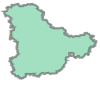

In [121]:
# there is a separate polygon shape fot Kiev city, excluded from its region
# merge them into one region and remove the city
merged_kiev = unary_union(df_regions[df_regions['NAME_1'].isin(['Kiev', 'Kiev City'])]['geometry'])
df_regions = df_regions.drop(df_regions[df_regions['NAME_1'] == 'Kiev City'].index)
df_regions.loc[df_regions['NAME_1'] == 'Kiev', 'geometry'] = merged_kiev
merged_kiev

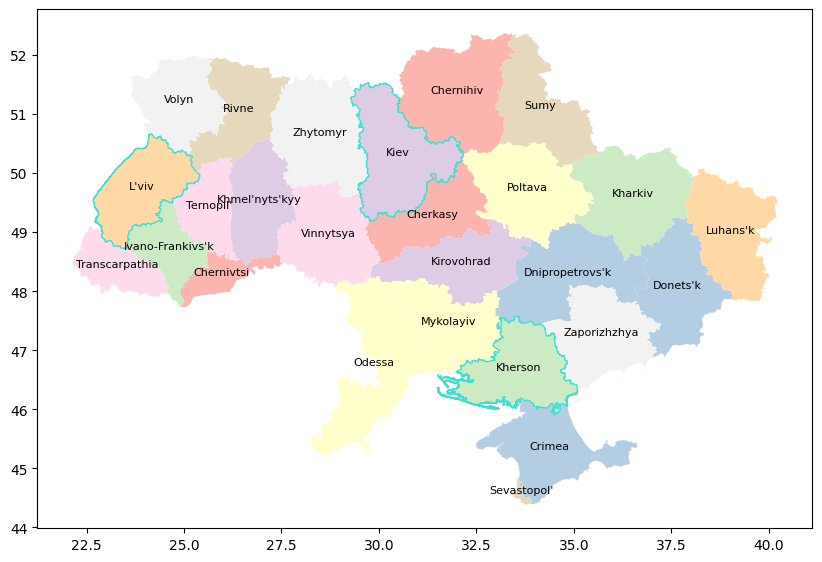

In [122]:
def plot_map(df, ax=None):
    ax = df.plot(ax=ax, cmap='Pastel1', figsize=(10, 10))

    # add regions names into the center of each shape
    df.apply(lambda x: plt.annotate(text=x['NAME_1'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)

    # highlight the existing warehouses with a balder outline
    df.loc[df['NAME_1'].isin(warehouses)].plot(ax=ax, facecolor='none', edgecolor='turquoise', linewidth=1)

plot_map(df_regions)

In [145]:
df_cities = pd.read_csv(cities_path)
df_cities.head()

points = [Point(d['longitude'], d['latitude']) for d in map(json.loads, df_cities['location'].to_numpy())]

df_cities = GeoDataFrame(df_cities, geometry=points)
df_cities.head()

,objectId,muni,featureCode,countryCode,cityId,ACL,name,population,updatedAt,location,country,createdAt,adminCode,geometry
0,WrTjJLmvV5,NaN,PPL,UA,505257,NaN,Urzuf,2904,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,"{""__type"":""GeoPoint"",""latitude"":46.91562,""long...",Ukraine,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,5,POINT (37.09961 46.91562)
1,mWzfykE61J,NaN,PPL,UA,686818,NaN,Zuhres,19121,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,"{""__type"":""GeoPoint"",""latitude"":48.0114,""longi...",Ukraine,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,5,POINT (38.26444 48.01140)
2,m6UGcfy7M7,NaN,PPLA2,UA,686896,NaN,Zolochiv,22608,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,"{""__type"":""GeoPoint"",""latitude"":49.80597,""long...",Ukraine,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,15,POINT (24.89436 49.80597)
3,RdvzwG5b8J,NaN,PPLA2,UA,618835,NaN,Zhydachiv,0,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,"{""__type"":""GeoPoint"",""latitude"":49.38468,""long...",Ukraine,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,15,POINT (24.14254 49.38468)
4,EFYhjj4o0L,11153029.0,PPLA3,UA,686748,NaN,Kovyl’noye,783,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,"{""__type"":""GeoPoint"",""latitude"":45.69028,""long...",Ukraine,Sat Dec 14 2019 04:09:22 GMT+0200 (Eastern Eur...,11,POINT (33.52775 45.69028)


In [140]:
df_report = pd.read_csv(report_path)
df_report.fillna(0, inplace=True)

df_report.head()

,Unnamed: 0,Статус,Населений пункт,Потребуючі,Що передаємо,К-сть осіб,Набір звичайний,Набір сімейний,дорослі щітки,доросла паста,шампунь,мило,жіночі прокладки,підгузки дитячі,підгузки дорослі
0,1,0,Харків,пенсіонерка,"предмети особистої гігієни, продукти харчування\n",1.0,1.0,0.0,1,1,1,1,0.0,0,0
1,2,відправлено,Харків,інвалід і батьки-пенсіонери,"предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,1.0,0,0
2,3,відправлено,Київ,ВПО з Херсону: мама і двоє дітей,"предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,2.0,0,0
3,4,відправлено,Запоріжжя,пенсіонерка,"предмети особистої гігієни, продукти харчування\n",1.0,1.0,0.0,1,1,1,1,1.0,0,0
4,5,відправлено,Костянтинівка Донецька обл,"пенсіонерка, мама-одиначка і дитина","предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,1.0,0,0


In [141]:
transliterated = [translit(name) for name in df_report['Населений пункт'].to_numpy()]
df_report.insert(3, 'city', transliterated)

df_report.head()

,Unnamed: 0,Статус,Населений пункт,city,Потребуючі,Що передаємо,К-сть осіб,Набір звичайний,Набір сімейний,дорослі щітки,доросла паста,шампунь,мило,жіночі прокладки,підгузки дитячі,підгузки дорослі
0,1,0,Харків,Kharkiv,пенсіонерка,"предмети особистої гігієни, продукти харчування\n",1.0,1.0,0.0,1,1,1,1,0.0,0,0
1,2,відправлено,Харків,Kharkiv,інвалід і батьки-пенсіонери,"предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,1.0,0,0
2,3,відправлено,Київ,Kyiv,ВПО з Херсону: мама і двоє дітей,"предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,2.0,0,0
3,4,відправлено,Запоріжжя,Zaporizhzhia,пенсіонерка,"предмети особистої гігієни, продукти харчування\n",1.0,1.0,0.0,1,1,1,1,1.0,0,0
4,5,відправлено,Костянтинівка Донецька обл,Kostiantynivka Donetska obl,"пенсіонерка, мама-одиначка і дитина","предмети особистої гігієни, продукти харчування\n",3.0,1.0,0.0,3,1,1,1,1.0,0,0


In [157]:
destinations = df_report['city'].to_numpy()
capacity = df_report['К-сть осіб'].to_numpy()

found = 0
found_dict = {}
for idx, city in enumerate(destinations):
    for subname in city.split(' '):
        if not df_cities[df_cities['name'] == subname].empty:
            found += 1
            if subname in found_dict:
                found_dict[subname] += int(capacity[idx])
            else:
                found_dict[subname] = int(capacity[idx])
            continue

print(f'Cities found: {found}\nCities not found: {len(destinations) - found}')


Cities found: 373
Cities not found: 397


In [164]:
df_destinations = df_cities[df_cities['name'].isin(found_dict.keys())][['name', 'geometry']]
df_destinations['capacity'] = list(map(found_dict.get, df_destinations['name'].to_numpy()))
df_destinations.head()

,name,geometry,capacity
2,Zolochiv,POINT (24.89436 49.80597),4
5,Druzhkivka,POINT (37.55259 48.63013),25
11,Lebedyn,POINT (34.48490 50.58518),4
18,Zolochiv,POINT (35.98179 50.27985),4
25,Zhytomyr,POINT (28.67669 50.26487),11


<AxesSubplot: >

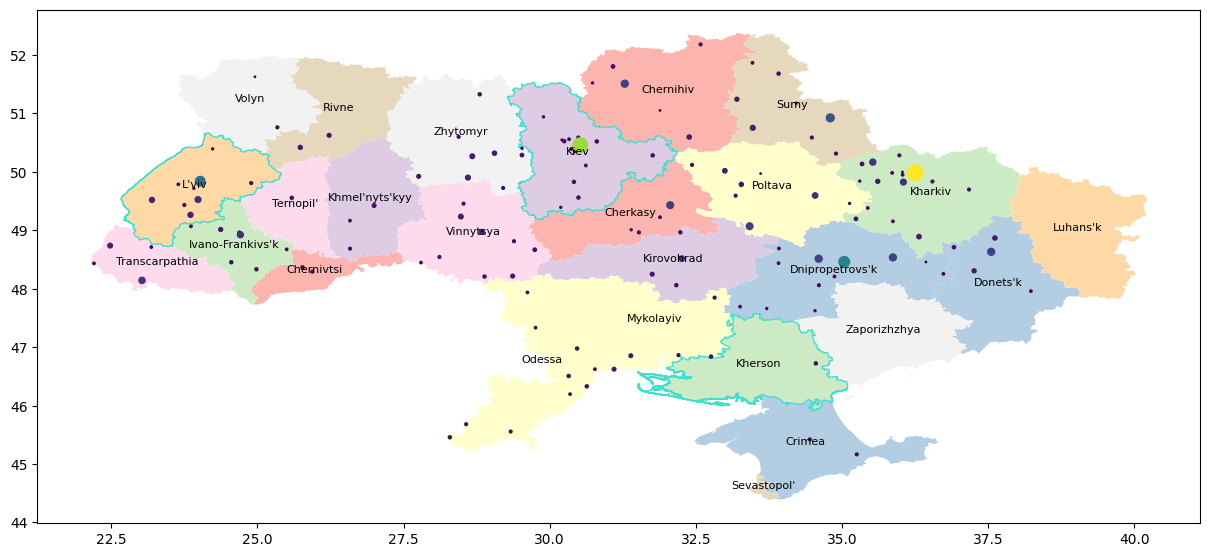

In [167]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_map(df_regions, ax)

df_destinations.plot(ax=ax, marker='o', markersize=df_destinations['capacity'], column='capacity')